# Importe

In [1]:
# Data
import pandas as pd
import sqlite3

# Scrape
import urllib
import requests
from bs4 import BeautifulSoup
from time import sleep
from tqdm import tqdm_notebook
# from copy import deepcopy



# Data

In [2]:
DB_CONNECT = 'C:/Users/lange/OneDrive/Dokumente/Studium/06_Abschlussarbeiten/Seminar/03_Data/hareg.db'
engine = sqlite3.connect(DB_CONNECT)
sql = '''SELECT* FROM df_firms'''
df_firms = pd.read_sql(sql, engine)
df_firms

,name,regricht,regart,regnum,url,label,text,gegenstand,capital,website,zeichen
0,AUDI AG,Ingolstadt,HRB,1,https://www.audi.de/,Automotive,\nHandelsregister B des Abteilung B Nummer der...,"Entwicklung, Herstellung und Vertrieb von Kraf...","110080000,00","b'<!DOCTYPE html>\n<html lang=""de"" class=""nm-c...",179
1,Volkswagen AG,Wolfsburg,HRB,100484,https://www.volkswagen.de/,Automotive,\nHandelsregister B des Abteilung B Nummer der...,Gegenstand des Unternehmens ist die Herstellun...,"1283315873,28","b'\n\n\n\n<!DOCTYPE html>\n<html lang=""de"" dir...",551
2,ŠKODA AUTO Deutschland GmbH,Darmstadt,HRB,5242,https://www.skoda-auto.de/,Automotive,\nHandelsregister B des Abteilung B Nummer der...,Ist der Import und der Vertrieb von Fahrzeugen...,"2045200,00","b'<!DOCTYPE html>\n<html dir=""ltr"" lang=""de-D...",155
3,Tesla Germany GmbH,Berlin (Charlottenburg),HRB,235261,https://www.tesla.com/de_de/,Automotive,\n- Wiedergabe des aktuellen Registerinhalts -...,"Herstellung, Import, Vertrieb, Verkauf, Wartun...","25000,00","b'<!DOCTYPE html><html lang=""de-DE"" dir=""ltr"" ...",1074
4,BMW AG,München,HRB,42243,https://www.bmw.de/,Automotive,\nHandelsregister B des Abteilung B Nummer der...,Herstellung und Vertrieb von Motoren und damit...,"661399500,00","b'<!DOCTYPE HTML><html lang=""de-DE"" dir=""ltr"" ...",248
...,...,...,...,...,...,...,...,...,...,...,...
109,METRO AG,Düsseldorf,HRB,79055,https://www.metroag.de/de,Wholesale,\nHandelsregister B des Abteilung B Nummer der...,Die Leitung und Förderung von Handels- und Die...,"363097253,00","b'\xef\xbb\xbf<!DOCTYPE html>\r\n<html xmlns=""...",785
110,BayWa AG,München,HRB,4921,https://www.baywa.com/,Wholesale,\nHandelsregister B des Abteilung B Nummer der...,Die Gesellschaft leitet eine internationale Un...,"91807715,84","b'<!doctype html>\n\n\n\n\n\n\n\n<html lang=""d...",1151
111,Brenntag GmbH,Duisburg,HRB,8894,https://www.brenntag.com/de-de/,Wholesale,\nHandelsregister B des Abteilung B Nummer der...,der Handel mit chemischen Erzeugnissen aller A...,"3000000,00",b'<!doctype html>\n<html data-n-head-ssr lang=...,528
112,Klöckner & Co SE,Duisburg,HRB,20486,https://www.kloeckner.com/de,Wholesale,\nHandelsregister B des Abteilung B Nummer der...,Gegenstand des Unternehmens ist (a) die Distri...,"249375000,00","b'<!doctype html>\n<html lang=""de"">\n<head>\n\...",342


# Scrape Sample Websites

In [3]:
def scrape_website(url):
    try:
        r = requests.get(url, allow_redirects=True, timeout=5)
        content = r.content
    except:     
        print(url, "nö")
        content = ""
        
    return content

In [4]:
df_firms["url"] = df_firms["url"].apply(lambda x: str(x))
df_firms["url"] = df_firms["url"].apply(lambda x: x.strip())

In [5]:
df_firms["website"] = ""
df_firms["website"] = df_firms["url"].apply(scrape_website)

https://www.adidas-group.com/de/ nö
https://www.hypovereinsbank.de/ nö
https://www.brenntag.com/de-de/ nö


In [6]:
df_firms 

,name,regricht,regart,regnum,url,label,text,gegenstand,capital,website,zeichen
0,AUDI AG,Ingolstadt,HRB,1,https://www.audi.de/,Automotive,\nHandelsregister B des Abteilung B Nummer der...,"Entwicklung, Herstellung und Vertrieb von Kraf...","110080000,00","b'<!DOCTYPE html>\n<html lang=""de"" class=""nm-c...",179
1,Volkswagen AG,Wolfsburg,HRB,100484,https://www.volkswagen.de/,Automotive,\nHandelsregister B des Abteilung B Nummer der...,Gegenstand des Unternehmens ist die Herstellun...,"1283315873,28","b'\n\n\n\n<!DOCTYPE html>\n<html lang=""de"" dir...",551
2,ŠKODA AUTO Deutschland GmbH,Darmstadt,HRB,5242,https://www.skoda-auto.de/,Automotive,\nHandelsregister B des Abteilung B Nummer der...,Ist der Import und der Vertrieb von Fahrzeugen...,"2045200,00","b'<!DOCTYPE html>\n<html dir=""ltr"" lang=""de-D...",155
3,Tesla Germany GmbH,Berlin (Charlottenburg),HRB,235261,https://www.tesla.com/de_de/,Automotive,\n- Wiedergabe des aktuellen Registerinhalts -...,"Herstellung, Import, Vertrieb, Verkauf, Wartun...","25000,00",b'',1074
4,BMW AG,München,HRB,42243,https://www.bmw.de/,Automotive,\nHandelsregister B des Abteilung B Nummer der...,Herstellung und Vertrieb von Motoren und damit...,"661399500,00","b'<!DOCTYPE HTML><html lang=""de-DE"" dir=""ltr"" ...",248
...,...,...,...,...,...,...,...,...,...,...,...
109,METRO AG,Düsseldorf,HRB,79055,https://www.metroag.de/de,Wholesale,\nHandelsregister B des Abteilung B Nummer der...,Die Leitung und Förderung von Handels- und Die...,"363097253,00","b'\xef\xbb\xbf<!DOCTYPE html>\r\n<html xmlns=""...",785
110,BayWa AG,München,HRB,4921,https://www.baywa.com/,Wholesale,\nHandelsregister B des Abteilung B Nummer der...,Die Gesellschaft leitet eine internationale Un...,"91807715,84","b'<!doctype html>\n\n\n\n\n\n\n\n<html lang=""d...",1151
111,Brenntag GmbH,Duisburg,HRB,8894,https://www.brenntag.com/de-de/,Wholesale,\nHandelsregister B des Abteilung B Nummer der...,der Handel mit chemischen Erzeugnissen aller A...,"3000000,00",,528
112,Klöckner & Co SE,Duisburg,HRB,20486,https://www.kloeckner.com/de,Wholesale,\nHandelsregister B des Abteilung B Nummer der...,Gegenstand des Unternehmens ist (a) die Distri...,"249375000,00","b'<!doctype html>\n<html lang=""de"">\n<head>\n\...",342


# Update DB

In [7]:
DB_CONNECT = 'C:/Users/lange/OneDrive/Dokumente/Studium/06_Abschlussarbeiten/Seminar/03_Data/hareg.db'
engine = sqlite3.connect(DB_CONNECT)
## df_firms.to_sql('df_firms', con=engine, if_exists='replace', index = False, chunksize=10000)

# Scrape Impressum 

In [8]:
DB_CONNECT = 'C:/Users/lange/OneDrive/Dokumente/Studium/06_Abschlussarbeiten/Seminar/03_Data/pds_data.db'
engine = sqlite3.connect(DB_CONNECT)

sql = '''SELECT* FROM train'''
train = pd.read_sql(sql, engine)

sql = '''SELECT* FROM test'''
test = pd.read_sql(sql, engine)

sql = '''SELECT* FROM dataset'''
dataset = pd.read_sql(sql, engine)

In [9]:
# Anzahl der verschiedenen Klassen
test['industry_label'].value_counts()

Information Technology and Services     1671
Mechanical or Industrial Engineering    1004
Marketing and Advertising                830
Management Consulting                    759
Financial Services                       469
Wholesale                                468
Medical Practice                         395
Construction                             390
Consumer Goods                           372
Automotive                               356
Renewables & Environment                 290
Real Estate                              240
Human Resources                          218
Logistics and Supply Chain               183
Recreational Facilities and Services     163
Telecommunications                       153
Insurance                                152
Leisure, Travel & Tourism                148
Legal Services                           135
Name: industry_label, dtype: int64

<AxesSubplot:>

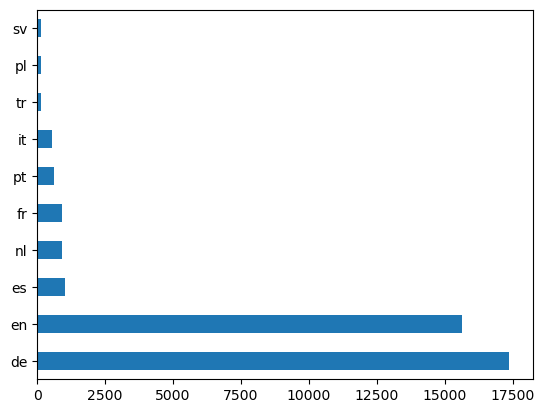

In [10]:
# Plotten der 10 häufigsten Sprachen zeigt, dass 'de' und 'en' klar dominieren
train.language_model.value_counts()[:10].plot(kind ='barh')

In [11]:
# Sprache Filtern, da im Handelsregister nur deutsche Unternehmen zu finden sind
def filter_language(df, speak = "de"):
    df_mask = df["language_model"] == speak
    filtered_data = df[df_mask]
    return filtered_data

test_sample = filter_language(test)

<AxesSubplot:>

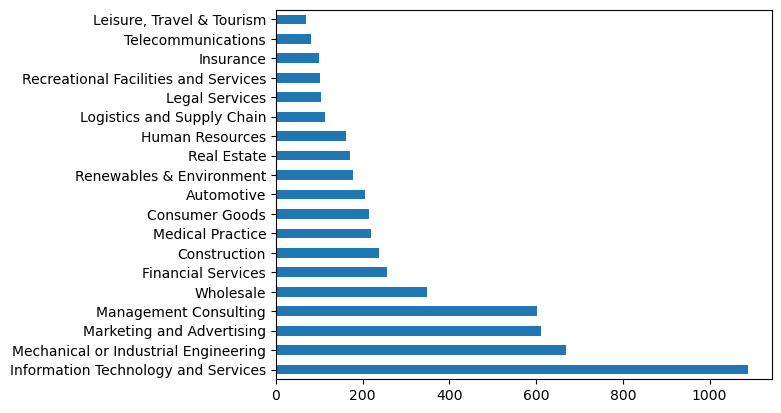

In [12]:
# Anzahl der Labels nur für deutschsprachige Daten als Chart
test_sample[test_sample.language_model == "de"].industry_label.value_counts().plot(kind ="barh")

In [13]:
def sampling_k_elements(group, k=20):
    if len(group) < k:
        return group
    return group.sample(k)

test_sample = test_sample.groupby('industry_label').apply(sampling_k_elements).reset_index(drop=True)

<AxesSubplot:>

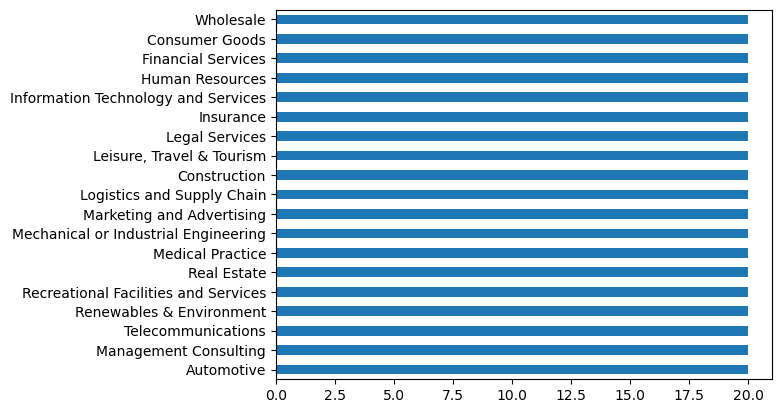

In [14]:
# Anzahl der Labels nur für deutschsprachige Daten als Chart
test_sample[test_sample.language_model == 'de'].industry_label.value_counts().plot(kind ='barh')

In [15]:
# # testen welche seiten erreichbar sind, um potentiell das Impressum auszulesen 
# for index in range(test_sample.shape[0]):
    
#     # print('Column Number : ', index)
#     columnSeriesObj = test_sample.iloc[index, 0:1]
#     # print('Column Contents : ', columnSeriesObj.values)
#     URL = str(columnSeriesObj.values)
#     URL = re.sub("\ |\[|\'|\]", "", URL)
#     print("URL:", URL)
#     print(urllib.request.urlopen(URL).getcode())

weiteres mögliches Vorgehen:
- Valide Seiten mit Selenium Aufrufen 
- Link zu Impressum identifizieren und folgen
- Impressum Scrapen
- Registerdaten identifizieren